<a href="https://colab.research.google.com/github/ppojawa/neural-network-course/blob/master/01_intro/01_pierwszy_model_sieci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
    1. [Import bibliotek](#a2)
    2. [Załadowanie i przygotowanie danych](#a3)
    3. [Eksploracja danych](#a4)
    4. [Budowa sieci neuronowej](#a5)    
    5. [Trenowanie modelu](#a6)
    6. [Ocena modelu](#a7)
    7. [Predykcja na podstawie modelu](#a8)

### <a name='a1'></a>1. Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z interfejsem Google Colab oraz budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

#### <a name='a2'></a> 1.1 Import bibliotek

In [2]:
# Przygotowanie środowiska do pracy z Tensorflow 2.0.
# Jeśli otrzymasz błąd podczas instalacji Tensorflow uruchom tę komórkę raz jeszcze.

!pip uninstall -y tensorflow
!pip install -q tensorflow==2.0.0

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
ERROR: Operation cancelled by user
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.0.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.14.0


### <a name='a3'></a> 1.2 Załadowanie i przygotowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [4]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a> 1.3 Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

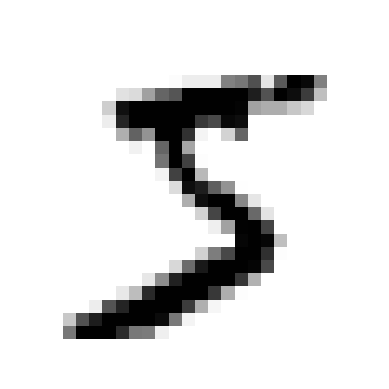

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

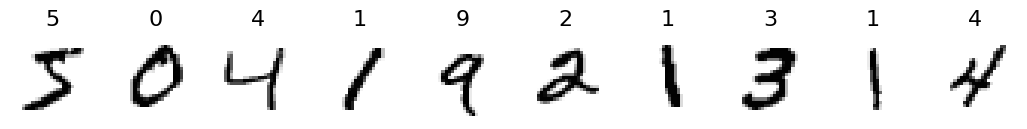

In [7]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

### <a name='a5'></a> 1.4 Budowa sieci neuronowej

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <a name='a6'></a> 1.5 Trenowanie modelu

In [9]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3014 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1468 - accuracy: 0.9562
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1073 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0909 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0769 - accuracy: 0.9758


### <a name='a7'></a> 1.6 Ocena modelu

In [10]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0766 - accuracy: 0.9766 - 760ms/epoch - 2ms/step


[0.07660678774118423, 0.9765999913215637]

In [11]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.301443,0.913400
1,0.146752,0.956167
2,0.107313,0.967683
3,0.090905,0.972183
4,0.076921,0.975783


In [12]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

### <a name='a8'></a> 1.7 Predykcja na podstawie modelu

In [15]:
mpred = model.predict(X_test)
mpred

313/313 [==============================] - 1s 3ms/step


array([[0.00000001291 , 0.000000016236, 0.000001257733, ..., 0.99998957    , 0.000000009493, 0.000001191879],
       [0.000000003448, 0.00023238569 , 0.99959475    , ..., 0.000000000014, 0.000006365883, 0.000000000084],
       [0.000000123153, 0.99829507    , 0.00079825183 , ..., 0.00076305895 , 0.00009046357 , 0.000000376279],
       ...,
       [0.000000000006, 0.000000000056, 0.000000000046, ..., 0.00002941102 , 0.000000470078, 0.00018744082 ],
       [0.0000000902  , 0.00000000416 , 0.000000000001, ..., 0.000000001846, 0.000009010931, 0.000000003368],
       [0.000000000277, 0.000000000095, 0.000000000323, ..., 0.000000000004, 0.000000000029, 0.            ]],
      dtype=float32)

In [17]:
y_pred = np.argmax(mpred, axis=-1) # model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [18]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [19]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([233, 247, 259, 321, 340, 381, 435, 445, 449, 495], dtype='int64')

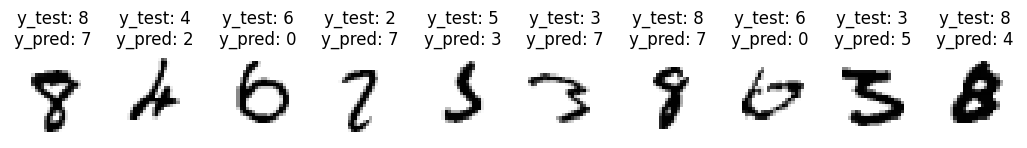

In [20]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()